In [4]:
# Descriptrion for the data:
# The dataset comes from patients who dis HPV test. There are 13 variables in the dataset:
#1. Patient_ID - Numbers given randomly to the patient after anonymizing the patient's identifier number
#2. HPV/p16 status - HPV status, with the results described as: 1 (i.e. Positive) or 0 (i.e. Negative)
#3. Gender - Patient's sex
#4. Age_at_diagnosis - Patient's age in years at the time of diagnosis
#5. Race - American Indian/Alaska Native, Asian, Black, Hispanic, White, NA (can't be identified)
#6. Tumor side - Right, left, bilateral
#7. Tumor_subsite - The subsite of the tumor within the oropharynx
#8. T_category - The T category describes the original (primary) tumor(as regard its size and extent, per the American Joint Committee on Caner (AJCC) and Union for International Cancer Control (UICC) cancer staging sysytem)
#9. N_category - The N category describes whether or not the cancer has reached nearby lymph nodes, per the AJCC and UICC cancer staging sysytem. It can be N0, N1, N2a, N2b, N2c or N3. 
#10.AJCC_Stage - AJCC cancer stage. 
#11.Pathological_grade - The grade of tumor differentiation. It is described as: I, II, III, IV, I-II, II-III or NA (couldn't be assessed)
#12.Smoking_status_at_diagnosis - Never, current, or former
#13.Smoking_Pack-Years - An equivalent numerical value of lifetime tobacco exposure. A pack year is defined as twenty cigarettes smoked everyday for one year. 
# To figure the correlations between those variables I create the following functions.

def correlationTable(data):
# This function mainly focused on extracting data and transforming data. The function can select variables that you 
# want to make the analysis by inputing column numbers(start from 1). It can calculate the correlations between each 
# other for selected variables and make the correlation into an Table. However, NOT all variables that you interested 
# in will have correlations with others, therefore, the output table will only show the variables having significant 
# correlations, and the output table may “smaller” than your input data frame.
    cols = input("Please input the numbers of correlation columns and split with ',' (e.g.: 1,2,3):").split(",")
    #select the variables that you need to do a correlation analysis
    for i in range(len(cols)):
        cols[i] = int(cols[i])-1
    # tranfer the data type of input from string into integer(which can be used to extract the data columns)
    colName = data.columns.tolist()
    colList=[]
    for i in range(len(colName)):
        colList.append(i)
    for i in colList:
        if i not in cols:
            del data[colName[i]]
    # modify the dataframe that only contains the variables to test correlations
    corr = data.corr()
    return corr

In [14]:
def magnify(): 
# This function is mainly used to set up the table style for the following corrTableColored function.
# You can change the sizes of table headers by altering the numbers following the "front-size".
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '10pt')])
] 
def corrTableColored(cor):
# To visualize the correlation data, I am going make gradient color palettes for the correlation table which will 
# present the correlation values more clearly. You can change the size of the number in the table by the 'front-size'
# from set_properties, and you can change the tittle for your table by altering the string conctent from set_caption.
    import seaborn as sns
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
    return cor.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Correlation Table")\
    .set_precision(2)\
    .set_table_styles(magnify())

def corrPlot(corr):
# This function is mainly to make a heatmap plot for the correlation table, with which you can make your correlations 
# more visualized. You can change the size, rotation and contents of x axis and y axis labels by the row of plt.setp().
    import seaborn as sns
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    %matplotlib inline
    f,ax = plt.subplots(figsize=(12,9))
    ax.set_xticklabels(corr,rotation='horizontal')
    sns.heatmap(corr, vmax =0.9,square=True)
    label_y = ax.get_yticklabels()
    plt.setp(label_y , rotation = 360)
    label_x = ax.get_xticklabels()
    plt.setp(label_x )
    plt.show()

In [6]:
#load dataset and show the head rows
import pandas as pd
import os
os.chdir('/Users/scarlettwu/Desktop/githubRepo') #if you want to try the local datasets, just change the path and filename.
myData = pd.read_csv('HPV.csv') 
myData.head()

,Patient_ID,HPV/p16_status,Gender,Age_at_diagnosis,Race,Tumor_side,Tumor_subsite,T_category,N_category,AJCC_Stage,Pathological_grade,Smoking_status_at_diagnosis,Smoking_Pack-Years
0,1,1,Male,58,White,L,Tonsil,2,0,II,III,Former,5.0
1,2,0,Female,78,White,R,BOT,3,0,III,II,Former,70.0
2,3,1,Male,57,White,R,Tonsil,1,2b,IV,III,Current,30.0
3,4,1,Female,56,White,R,BOT,2,2b,IV,III,Never,0.0
4,5,1,Female,60,White,L,Tonsil,2,2b,IV,II,Never,0.0


In [7]:
corr = correlationTable(myData) # apply the first function with my hpv dataset
corrTableColored(corr) # apply the second part of functions with the correlation table of the selected variables

Please input the numbers of correlation columns and split with ',' (e.g.: 1,2,3):2,3,4,5,6,7,8,9,10,11,12,13


,HPV/p16_status,Age_at_diagnosis,T_category,Smoking_Pack-Years
HPV/p16_status,1,-0.16,-0.25,-0.17
Age_at_diagnosis,-0.16,1,0.17,0.071
T_category,-0.25,0.17,1,0.27
Smoking_Pack-Years,-0.17,0.071,0.27,1


  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  axes: an :class:`~matplotlib.axes.Axes` instance 
  backgroundcolor: any matplotlib color 
  bbox: FancyBboxPatch prop dict 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color: any matplotlib color 
  contains: a callable function 
  family or fontfamily or fontname or name: [FONTNAME | 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace' ] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fontproperties or font_properties: a :class:`matplotlib.font_manager.FontProperties` instance 
  gid: an id string 
  horizontalalignment or ha: [ 'center' | 'right' | 'left' ] 
  label: string or anything printable with '%s' conversion. 
  linespacing: float (multiple of font size) 
  multialignment: 

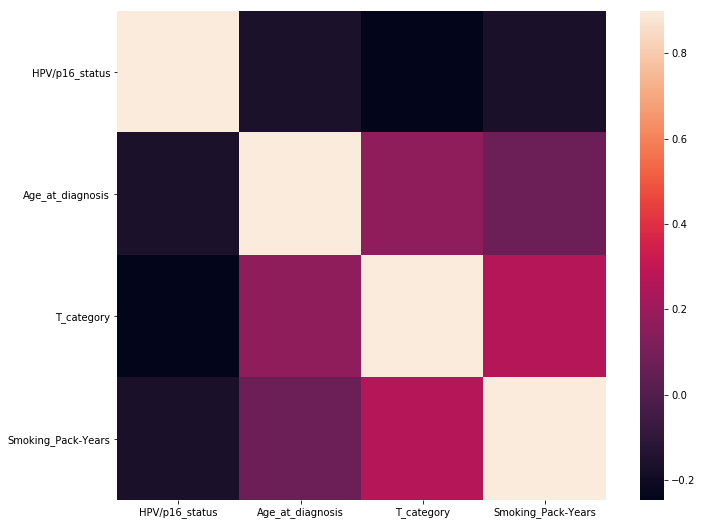

In [15]:
corrPlot(corr) # apply the third function with the correlation table with variables selected above 